Create fisher information plots like in  
"Roesch, E., & Stumpf, M. P. H. (2019). Parameter inference in dynamical systems with co-dimension 1 bifurcations. *Royal Society Open Science, 6*(190747). [https://doi.org/10.1098/rsos.190747](https://royalsocietypublishing.org/doi/pdf/10.1098/rsos.190747)"

In [ ]:
import sys
sys.path.append('C:/Users/lisah/Documents/Repos/ma-code')
#from src.plots_ll_fish import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

from numpy import inf

def bif_plot(ax, m):
    a_vals = np.linspace(2*m, 2, 400)
    n_plus = [n(a, m, True) for a in a_vals]
    n_minus = [n(a, m, False) for a in a_vals]

    ax.plot(a_vals, np.real(n_plus), color='blue',linewidth=2)
    ax.plot(a_vals, np.real(n_minus), color='blue', linestyle="--",linewidth=2)
    ax.plot(2*m, 1, marker='o', color='blue', markersize=6)
    ax.set_ylim(0, 4)
    ax.axhline(y=0, color='blue', linewidth=4)
    ax.set_xlabel('Water Input a')
    ax.set_ylabel('Biomass n')
    ax.grid(True)
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)

"""eval the biomass n equilibria in dependece of a,m (see bifurcation plot)
"""
def n(a,m,plus: bool):

    sqrt_term = np.sqrt(a**2 - 4 * m**2)

    if plus:
        return (a + sqrt_term) / (2 * m)
    else:
        return (a - sqrt_term) / (2 * m)

def read_fish_file(w0, m, M, noise, path_to_file):
    name="fish"+"_"+str(w0)+"_"+str(m)+"_"+str(M)+"_"+str(noise)
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    return csv

def make_all_fish_plots(M_vals, noise_vals, w0, m, path_to_read, path_to_store, store=False):

    for M in M_vals:
        for noise in noise_vals:
            
            csv = read_fish_file(w0,m,M,noise,path_to_read)
            fig, ax = plt.subplots()
            make_fish_plot(fig, ax, csv)
            bif_plot(ax,m)
            ax.set_title(f"M={M}, noise={noise}")

            if store: 
                plt.savefig(f"{path_to_store}fish_{w0}_{m}_{M}_{noise}.pdf", bbox_inches='tight')

In [ ]:
def make_fish_plot(fig, ax, csv):

    min_val = np.min(csv)
    if min_val <= 0:
        csv = csv - min_val + 1e-10  # Shift all values so the minimum becomes ~0+

    # take log data bec values are very high
    csv = np.log(csv)

    # points at which fish data is evaluated
    a_x_ticks = np.arange(0.0, 2.1, 0.1)
    inits_y_ticks = np.arange(0.0, 4.1, 0.1)

    # all values below -8 are mapped to -8
    levels = np.linspace(math.ceil(np.min(csv)),  math.floor(np.max(csv)),20)

    #ax.grid(color='grey', linestyle='-',alpha=0.1, linewidth=1)
    #ax.set_facecolor('white')
    countouring=ax.contourf(a_x_ticks, inits_y_ticks, csv,30,cmap='Blues',alpha=0.9, levels=levels)
    ax.set_yticks(inits_y_ticks[::4])
    ax.set_xticks(a_x_ticks[::4])
    ax.set_xlabel("a")
    ax.set_ylabel("IC")
    cbar = fig.colorbar(countouring,fraction=0.09)
    cbar.ax.set_ylabel('Fisher information')
    cbar.set_ticks([math.ceil(np.min(csv)), math.floor(np.max(csv))])
    return countouring

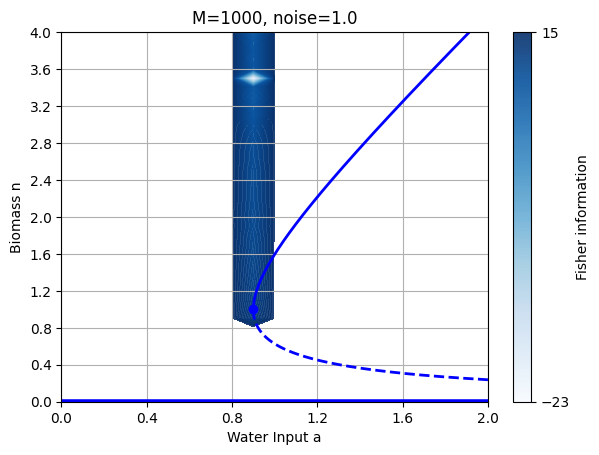

In [7]:
# generate all fisher plots

M_vals = [1000]
noise_vals = [1.0]
m = 0.45 # fix for now as given by literature
w0 = 0.95 # mean(a_vals)
store = False

path_to_read= f"c:/Users/lisah/Documents/Repos/ma-code/data/fisher/m{m}/"
path_to_store = f"c:/Users/lisah/Documents/Repos/ma-code/plots/fisher/m{m}/"

make_all_fish_plots(M_vals, noise_vals, w0, m, path_to_read, path_to_store, store)

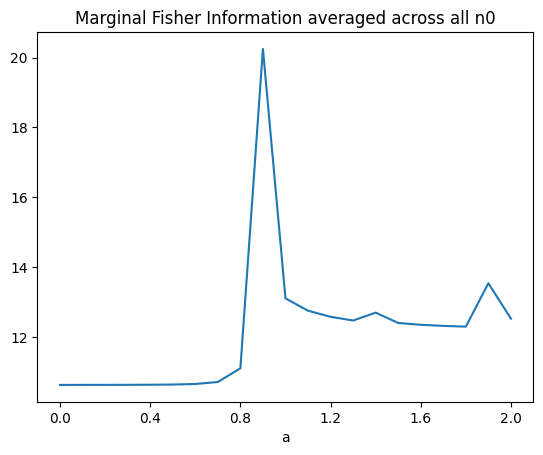

In [6]:
M = 1000
noise = 0.0

csv = read_fish_file(w0,m,M,noise, f"c:/Users/lisah/Documents/Repos/ma-code/data/fisher/m{m}/")
fig, ax = plt.subplots()
fi_avg_ic(fig, ax, csv)
#plt.savefig(f"c:/Users/lisah/Documents/Repos/ma-code/plots/fisher/m0.45/fish_ma_{w0}_{m}_{M}_{noise}.pdf", bbox_inches='tight')

(array([10]),)


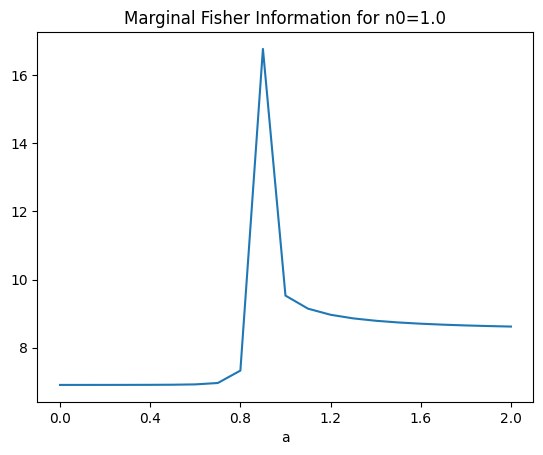

In [7]:
fig, ax = plt.subplots()
ic = 1.0
fi_ic(fig, ax, csv, ic)
#plt.savefig(f"c:/Users/lisah/Documents/Repos/ma-code/plots/fisher/m0.45/fish_m{ic}_{w0}_{m}_{M}_{noise}.pdf", bbox_inches='tight')

(array([4]),)


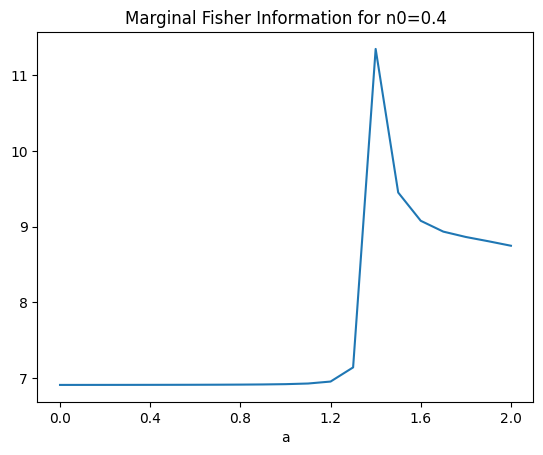

In [8]:
fig, ax = plt.subplots()
fi_ic(fig, ax, csv, 0.4)

(array([], dtype=int64),)


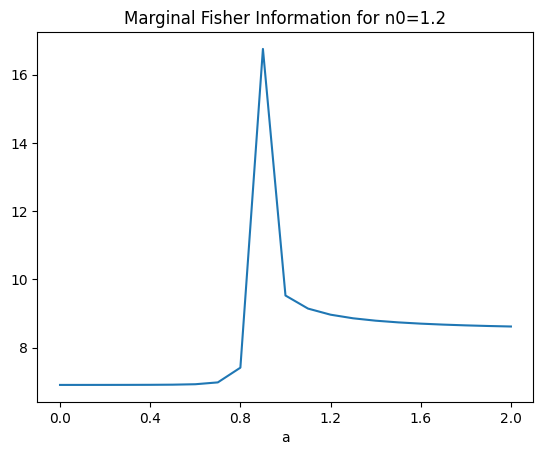

In [9]:
fig1, ax1 = plt.subplots()
fi_ic(fig1, ax1, csv, 1.2)